In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [3]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # For each episode
    for i_episode in range(1, num_episodes + 1):
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        rewards = []
        states = []
        
        # Reset the env
        observation = env.reset()
        states.append(observation) # S1
        discount = 1.0 / discount_factor
        # Keep playing yo
        while True:            
            action = policy(observation)
            observation, reward, done, _ = env.step(action)
            discount = discount * discount_factor
            rewards.append(discount * reward)
            if not done:
                states.append(observation)
            else:
                break
        
        # Done episode, now estimate values
        visited = defaultdict(bool)
        for i, state in enumerate(states):
            if not visited[state]:
                visited[state] = True
                returns_count[state] += 1
                G_t = sum([r * (discount_factor ** j) for j, r in enumerate(rewards[i:])])
                V[state] += (G_t - V[state]) / returns_count[state]
    
    return V    

In [4]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is >= 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

Episode 10000/10000.

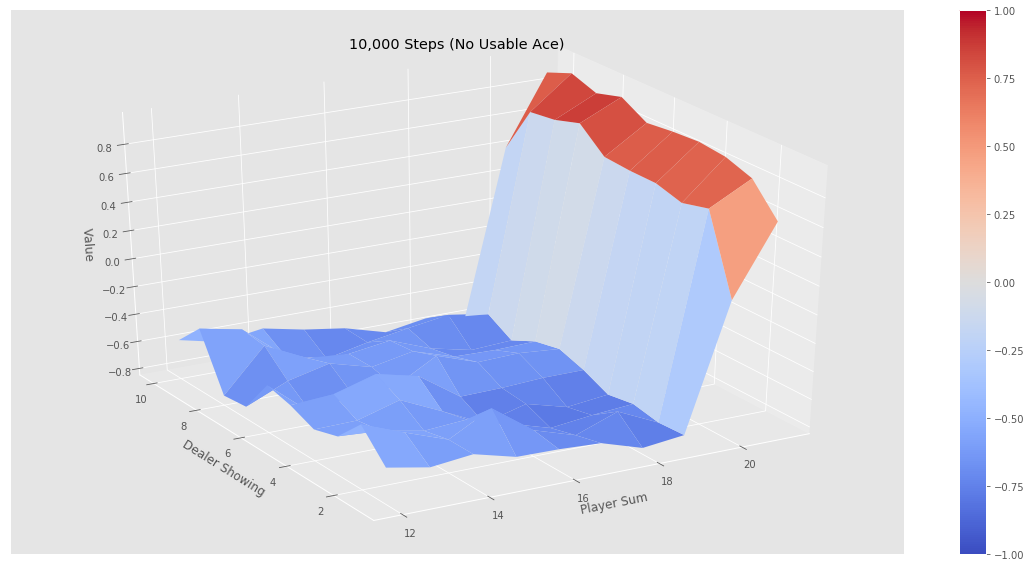

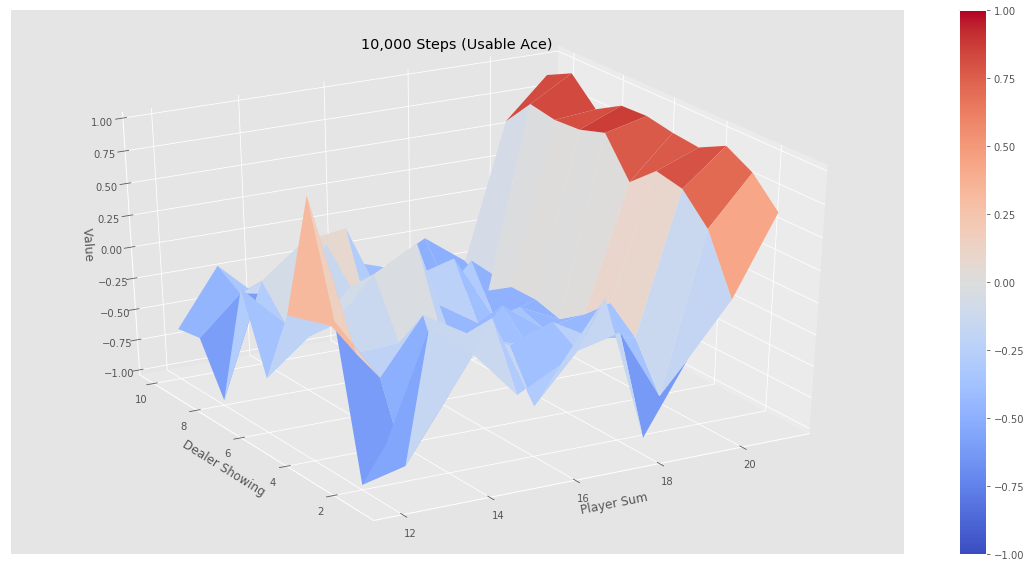

Episode 500000/500000.

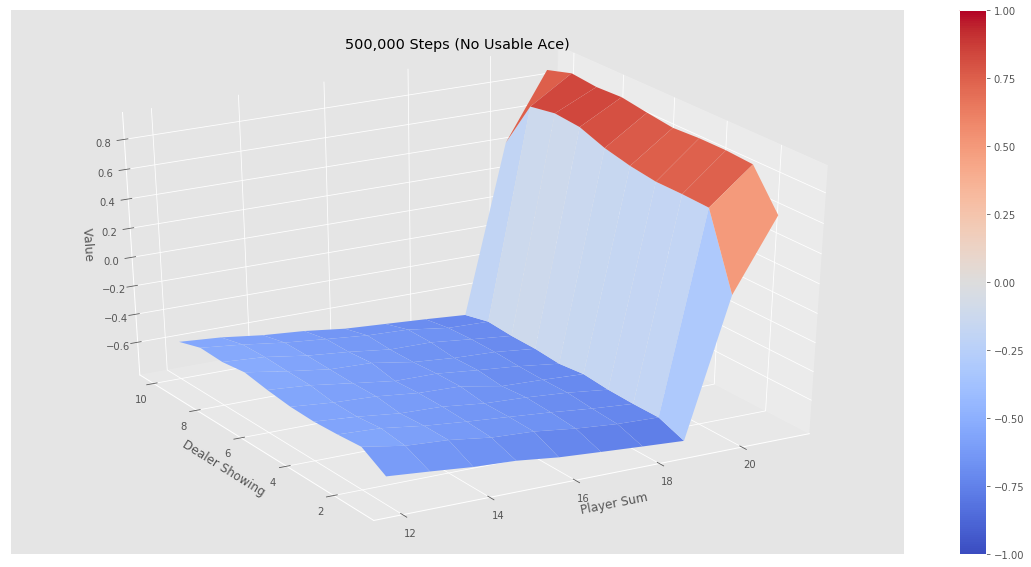

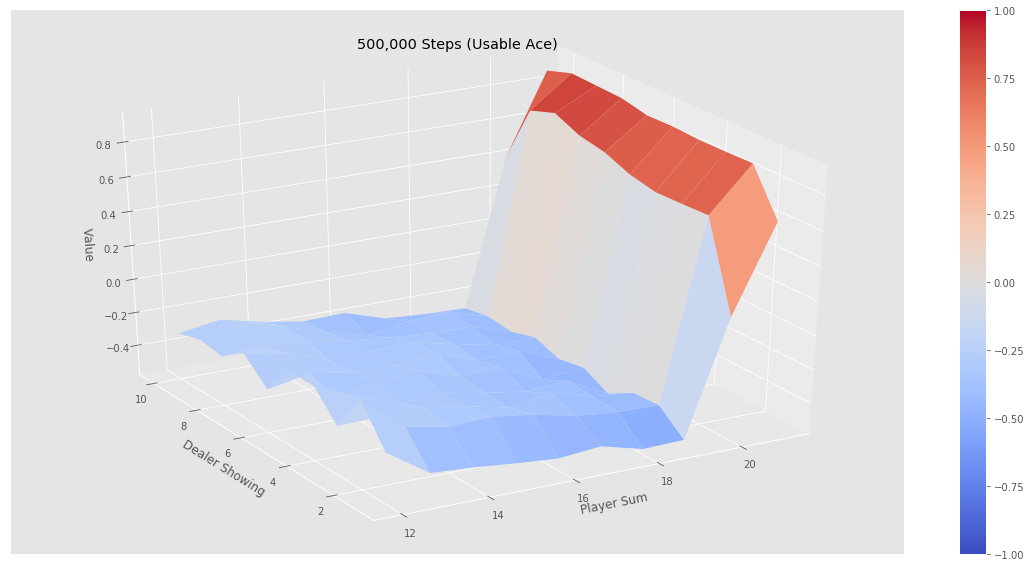

In [5]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")